<a href="https://colab.research.google.com/github/eylulpelinkilic/Clash-Royale-DSA210-Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explaratory Data Analysis**

Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [16]:
df = pd.read_excel("matches.xlsx")
df["playerCards"] = df["playerDeck"].str.split(",")
df["opponentCards"] = df["opponentDeck"].str.split(",")

Shared Cards (For HT3)

In [17]:
df["shared_cards"] = df.apply(lambda row: len(set(row["playerCards"]) & set(row["opponentCards"])), axis=1)
df["elixir_diff"] = df["playerAvgElixir"] - df["opponentAvgElixir"]

Win Rate Pie Chart

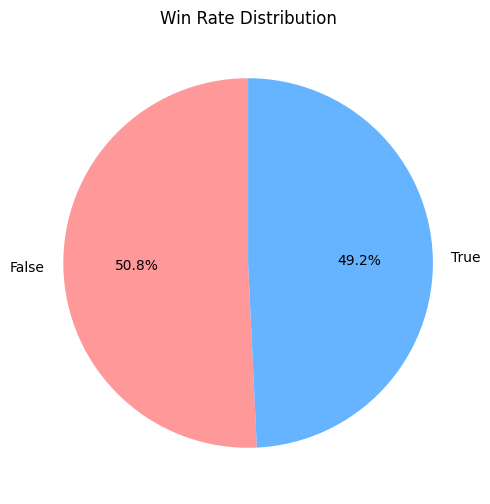

In [18]:
plt.figure(figsize=(6,6))
df["win"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Win Rate Distribution")
plt.ylabel("")
plt.show()

Histogram of Elixir Costs

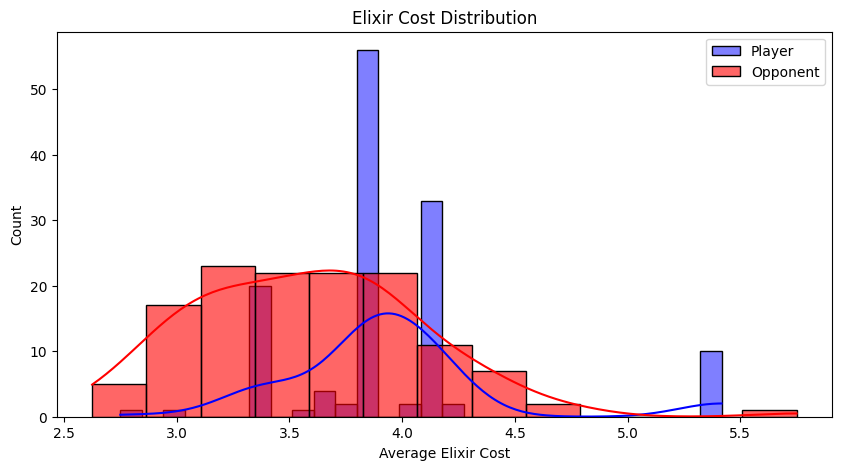

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df["playerAvgElixir"], kde=True, color="blue", label="Player")
sns.histplot(df["opponentAvgElixir"], kde=True, color="red", label="Opponent", alpha=0.6)
plt.legend()
plt.title("Elixir Cost Distribution")
plt.xlabel("Average Elixir Cost")
plt.show()

Box Plot: Shared Cards vs Win

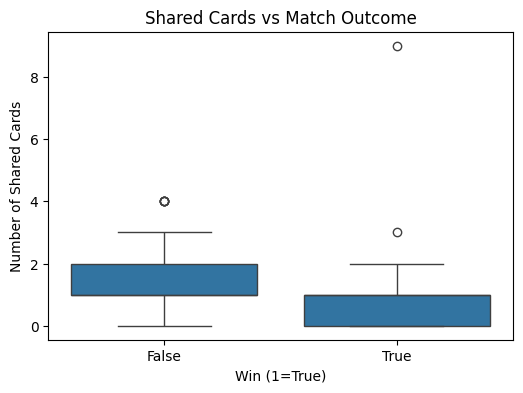

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="win", y="shared_cards", data=df)
plt.title("Shared Cards vs Match Outcome")
plt.xlabel("Win (1=True)")
plt.ylabel("Number of Shared Cards")
plt.show()

Violin Plot: Elixir Difference by Result

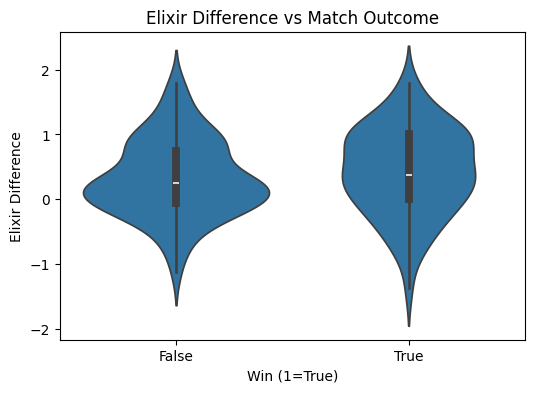

In [21]:
plt.figure(figsize=(6,4))
sns.violinplot(x="win", y="elixir_diff", data=df)
plt.title("Elixir Difference vs Match Outcome")
plt.xlabel("Win (1=True)")
plt.ylabel("Elixir Difference")
plt.show()